In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/jobkorea.csv')

In [8]:
df.head()

,company,title,score,spec,text,advice_total,advice_detail
0,(주)LG화학,2021년 하반기 신입 생산관리·공정관리·품질관리,2.0,"['서울4년', '화학공학부', '학점 3.87/4.5', '토익 860', '오픽...","['""공정데이터 분석으로 생산량 20% 증가""\r\r저는 화학공학을 전공으로 하면서...",['전반적으로 지원자만의 호감 요소를 발견할 수 없없습니다. 많은 지원자들이 일반적...,['아쉬운점 1 회사 지원동기는 묻지 않았습니다. 지원 직무에 대한 지원동기에 집중...
1,고려신용정보(주),2021년 하반기 인턴 기획·전략·경영,2.0,"['수도권4년', '행정학과', '학점 3.54/4.5', '토익 875', '오픽...","['""소통 능력을 통한 고객 만족 실천""\r\r가족들이나 친구들 사이에 생긴 문제들...","['이 회사에 지원하는 이유를 잘 모르겠습니다. 즉, 행정을 전공한 지원자가 왜 신...","['좋은점 1 성장과정에 어울리게 시작한 점이 좋습니다.', '아쉬운점 1 소통에 ..."
2,대덕전자(주),2021년 상반기 신입 전기·전자·제어,2.0,"['수도권4년', '전자공학과', '학점 3.8/4.5', '토익 860', '토스...",['반도체”라는 키워드를 들었을 때 대한민국이 떠오르기까지 많은 사람의 노력과 좌절...,"['지원자는 반도체에 대한 관심 때문에 이 회사에 지원했다고 했는데, 자기소개서 내...","['아쉬운점 1 회사에 대한 깊이 있는 조사, 분석 없이 표면적인 정보만을 활용한 ..."
3,(주)실리콘웍스,2021년 상반기 인턴 연구소·R&D,2.0,"['수도권4년', '전자공학과', '학점 3.8/4.5', '토익 860', '토스...",['“반도체”라는 키워드를 들었을 때 대한민국이 떠오르기까지 많은 사람의 노력과 좌...,"['전반적으로 특별함이 없습니다. 자기소개서는 지원자의 감성적 특성, 검증 불가능한...","['아쉬운점 1 회사에 대한 깊이 있는 조사, 분석 없이 표면적인 정보만을 활용한 ..."
4,현대종합특수강(주),2021년 상반기 신입 사무·총무·법무,2.0,"['지방4년', '산업공학과', '학점 3.35/4.5', '토익 810', '자격...","['""윤활유 같은 인재""\r \r저는 평범한 사람입니다. 초중고 학창시절에서부터 ...",['특별한 내용이 없다는 점이 아쉽습니다. 지원자가 왜 이 회사에 지원했는지 알 수...,['아쉬운점 1 지원자 나름대로 이렇게 쓴 의도가 있었을 것입니다. 하지만 그다지 ...


In [13]:
import json, ast

In [14]:
def create_spec_split(d):
    
    spec= d['spec']
    spec = ast.literal_eval(spec)
    univ, degree, point, toeic, toeic_speaking, opic, cert_num, act_school, \
    act_society, act_volunteer, act_oversea, act_intern, act_prize, act_club, lang = [None for i in range(15)]
    for item in spec:
        if item.endswith('년') or item in ["고졸","초대졸", "대학원"]:
            univ = item
        elif item.startswith('학점'):
            r = item.split()[-1]
            point = r
        elif item.startswith('토익'):
            r = item.split()[-1]
            toeic = int(r)
        elif item.startswith('토스'):
            r = item.split()[-1].replace('Level','')
            toeic_speaking = r
        elif item.startswith('오픽'):
            r = item.split()[-1]
            opic = r
        elif item.startswith('자격증'):
            r = item.split()[-1].replace('개','')
            cert_num = int(r)
        elif item.startswith('교내활동'):
            r = item.split()[-1].replace('회','')
            act_school = int(r)
        elif item.startswith('사회활동'):
            r = item.split()[-1].replace('회','')
            act_society = int(r)
        elif item.startswith('자원봉사'):
            r = item.split()[-1].replace('회','')
            act_volunteer = int(r)
        elif item.startswith('해외경험'):
            r = item.split()[-1].replace('회','')
            act_oversea = int(r)
        elif item.startswith('인턴'):
            r = item.split()[-1].replace('회','')
            act_intern = int(r)
        elif item.startswith('수상'):
            r = item.split()[-1].replace('회','')
            act_prize = int(r)
        elif item.startswith('동아리'):
            r = item.split()[-1].replace('회','')
            act_club = int(r)
        elif item.startswith('제2외국어'):
            r = item.split()[-1].replace('개','')
            act_lang = int(r)
        else:
            degree = item
    return pd.Series((univ, degree, point, toeic, toeic_speaking, opic, cert_num, act_school, 
            act_society, act_volunteer, act_oversea, act_intern, act_prize, act_club, lang ))
df[['univ', 'degree', 'point', 'toeic', 'toeic_speaking', 
    'opic', 'cert_num', 'act_school', 
    'act_society', 'act_volunteer', 'act_oversea', 
    'act_intern', 'act_prize', 'act_club', 'lang' ]] = df.apply(create_spec_split, axis=1)

In [15]:
df[df['company']=="한국철도공사"].iloc[9]['spec']
# univ, major, point, toeic toeic_speaking, cert_num act_school, act_society act_volunteer

"['지방4년', '화학공학부', '학점 3.5/4.5', '토익 820', '토스 Level5', '오픽 IM1', '자격증 3개', '인턴 1회', '수상 1회', '동아리 1회', '교내활동 3회', '사회활동 2회']"

In [16]:
df.groupby('company').mean()

,score,toeic,cert_num,act_school,act_society,act_volunteer,act_oversea,act_intern,act_prize,act_club
company,,,,,,,,,,
(사)대한체육회,2.0,815.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0
(사)한국음악저작권협회,2.5,767.5,1.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN
(사)한국정보산업연합회,2.0,865.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
(사)한국화재보험협회,3.0,875.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(유)스태츠칩팩코리아,2.0,895.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
효성화학,2.0,850.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
휴온스,2.5,930.0,NaN,1.0,NaN,NaN,1.5,1.0,3.0,2.5
희성폴리머㈜,2.0,740.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,2.0


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='AppleGothic')

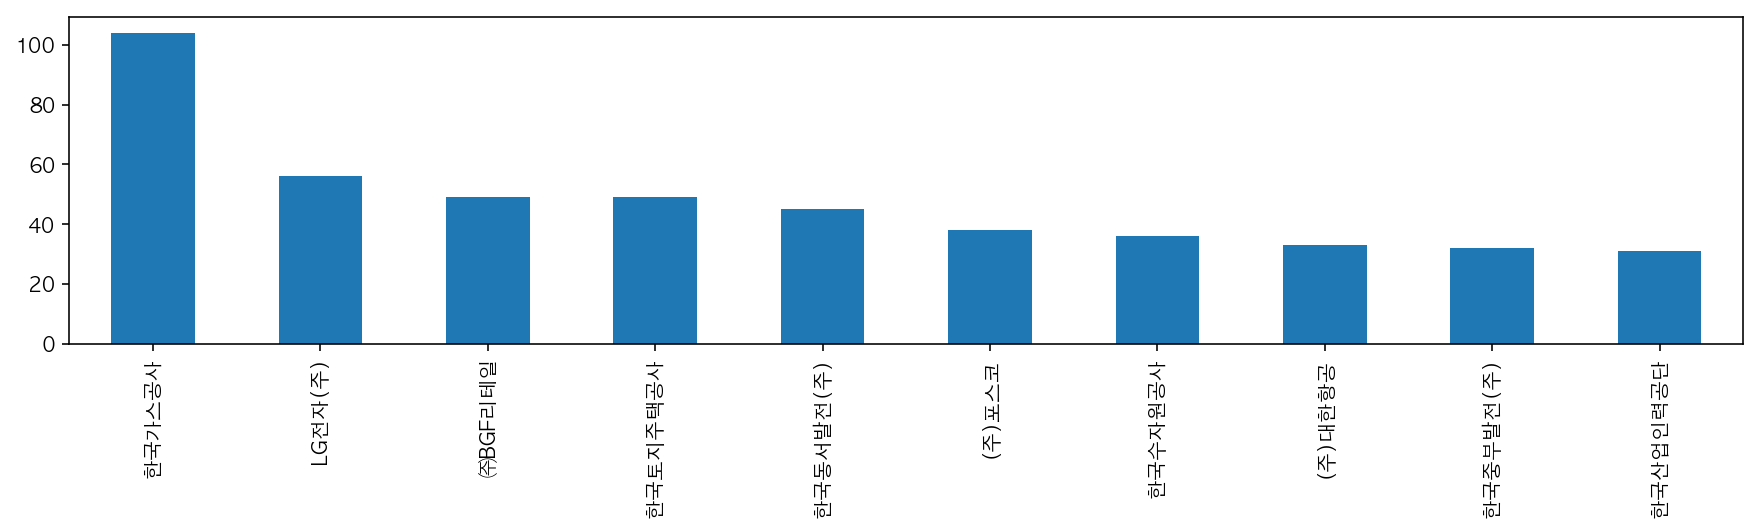

In [63]:
df['company'].value_counts().iloc[:10].plot.bar(figsize=(15,3))
plt.savefig('data/resume_num_1_10.png')
df['company'].value_counts().iloc[10:20].plot.bar(figsize=(15,3))
plt.savefig('data/resume_num_11_20.png')

In [39]:
result = []
for idx, row in df[['title']].iterrows():
    d =row['title'].split() # 년도, 상/하반기, 신입/인턴, 직무
    result.append({'year': d[0], 'half': d[1], 'class': d[2], 'task': d[3]})

In [40]:
df_class = pd.DataFrame(result)

In [41]:
df_class['class'].unique() # 새로 뽑는 과정에서의 자소서들

array(['신입', '인턴'], dtype=object)

In [42]:
df_class_new = pd.DataFrame()
for i in range(0,len(df_class['task'].unique()),10):
    tmp = pd.DataFrame(sorted(df_class['task'].unique())[i:i+10])
    df_class_new = pd.concat([df_class_new, tmp], axis=1, ignore_index=True)

In [43]:
df_class_new

,0,1,2,3,4,5,6,7,8,9
0,CS관리·강의,게임,기획·전략·경영,법률·특허·상표,상품기획·MD,아웃바운드TM,웹기획·PM,자격증·기술·전문교육,컨텐츠·사이트운영,회계·세무·CPA
1,DBA·데이터베이스,경리·회계·결산,네트워크·서버·보안,법인영업,생산·제조·설비·조립,여행·항공·숙박,웹디자인,자동차·조선·기계,토목·조경·도시·측량,NaN
2,ERP·시스템분석·설계,경영분석·컨설턴트,대학교수·강사·행정직,보습학원·입시학원,생산관리·공정관리·품질관리,연구소·R&D,웹프로그래머,재무·세무·IR,통신기술·네트워크구축,NaN
3,HTML·퍼블리싱·UI개발,고객상담·인바운드,디자인기타,부동산·중개·분양·경매,설치·정비·A/S,영상·사진·촬영,유통·물류·재고,전기·소방·통신·안전,판매·서빙·매장관리,NaN
4,IT·디자인·컴퓨터강사,공연·전시·무대·스텝,레저·스포츠,비서·안내,섬유·의류·패션,영업관리·지원·영업기획,음악·음향,전기·전자·제어,학습지·과외·방문교사,NaN
5,IT·솔루션·기술영업,광고영업,리서치·통계·설문,빅데이터·AI(인공지능),소프트웨어·하드웨어,영화·배급,응용프로그래머,전시·컨벤션,학원상담·관리·운영,NaN
6,QA·테스터·검증,구매·자재,마케팅·광고·분석,사무·원무·코디,수출입·무역사무,외국어·번역·통역,의료직기타,제품·산업디자인,해외영업·무역영업,NaN
7,간호사,그래픽디자인·CG,바이오·제약·식품,사무·총무·법무,시공·현장·감리·공무,외국어교육,의류·패션·잡화디자인,제품·서비스영업,홍보·PR,NaN
8,감독·연출·PD,금융·보험영업,반도체·디스플레이,사무보조·문서작성,시설·보안·경비·안전,요리·영양·제과제빵·바리스타,의사·치과·한의사,채권·심사·보험·보상,화학·에너지·환경,NaN
9,건축·설계·인테리어,기계설계·CAD·CAM,배송·택배·운송,사회복지·요양보호·자원봉사,시스템프로그래머,운전·기사,인사·노무·교육,캐릭터·애니메이션,환경·플랜트,NaN


In [46]:
task_list = sorted(df_class['task'].unique())
task_num = []
for task in task_list:
    task_num.append(len(df_class[df_class['task']==task]))

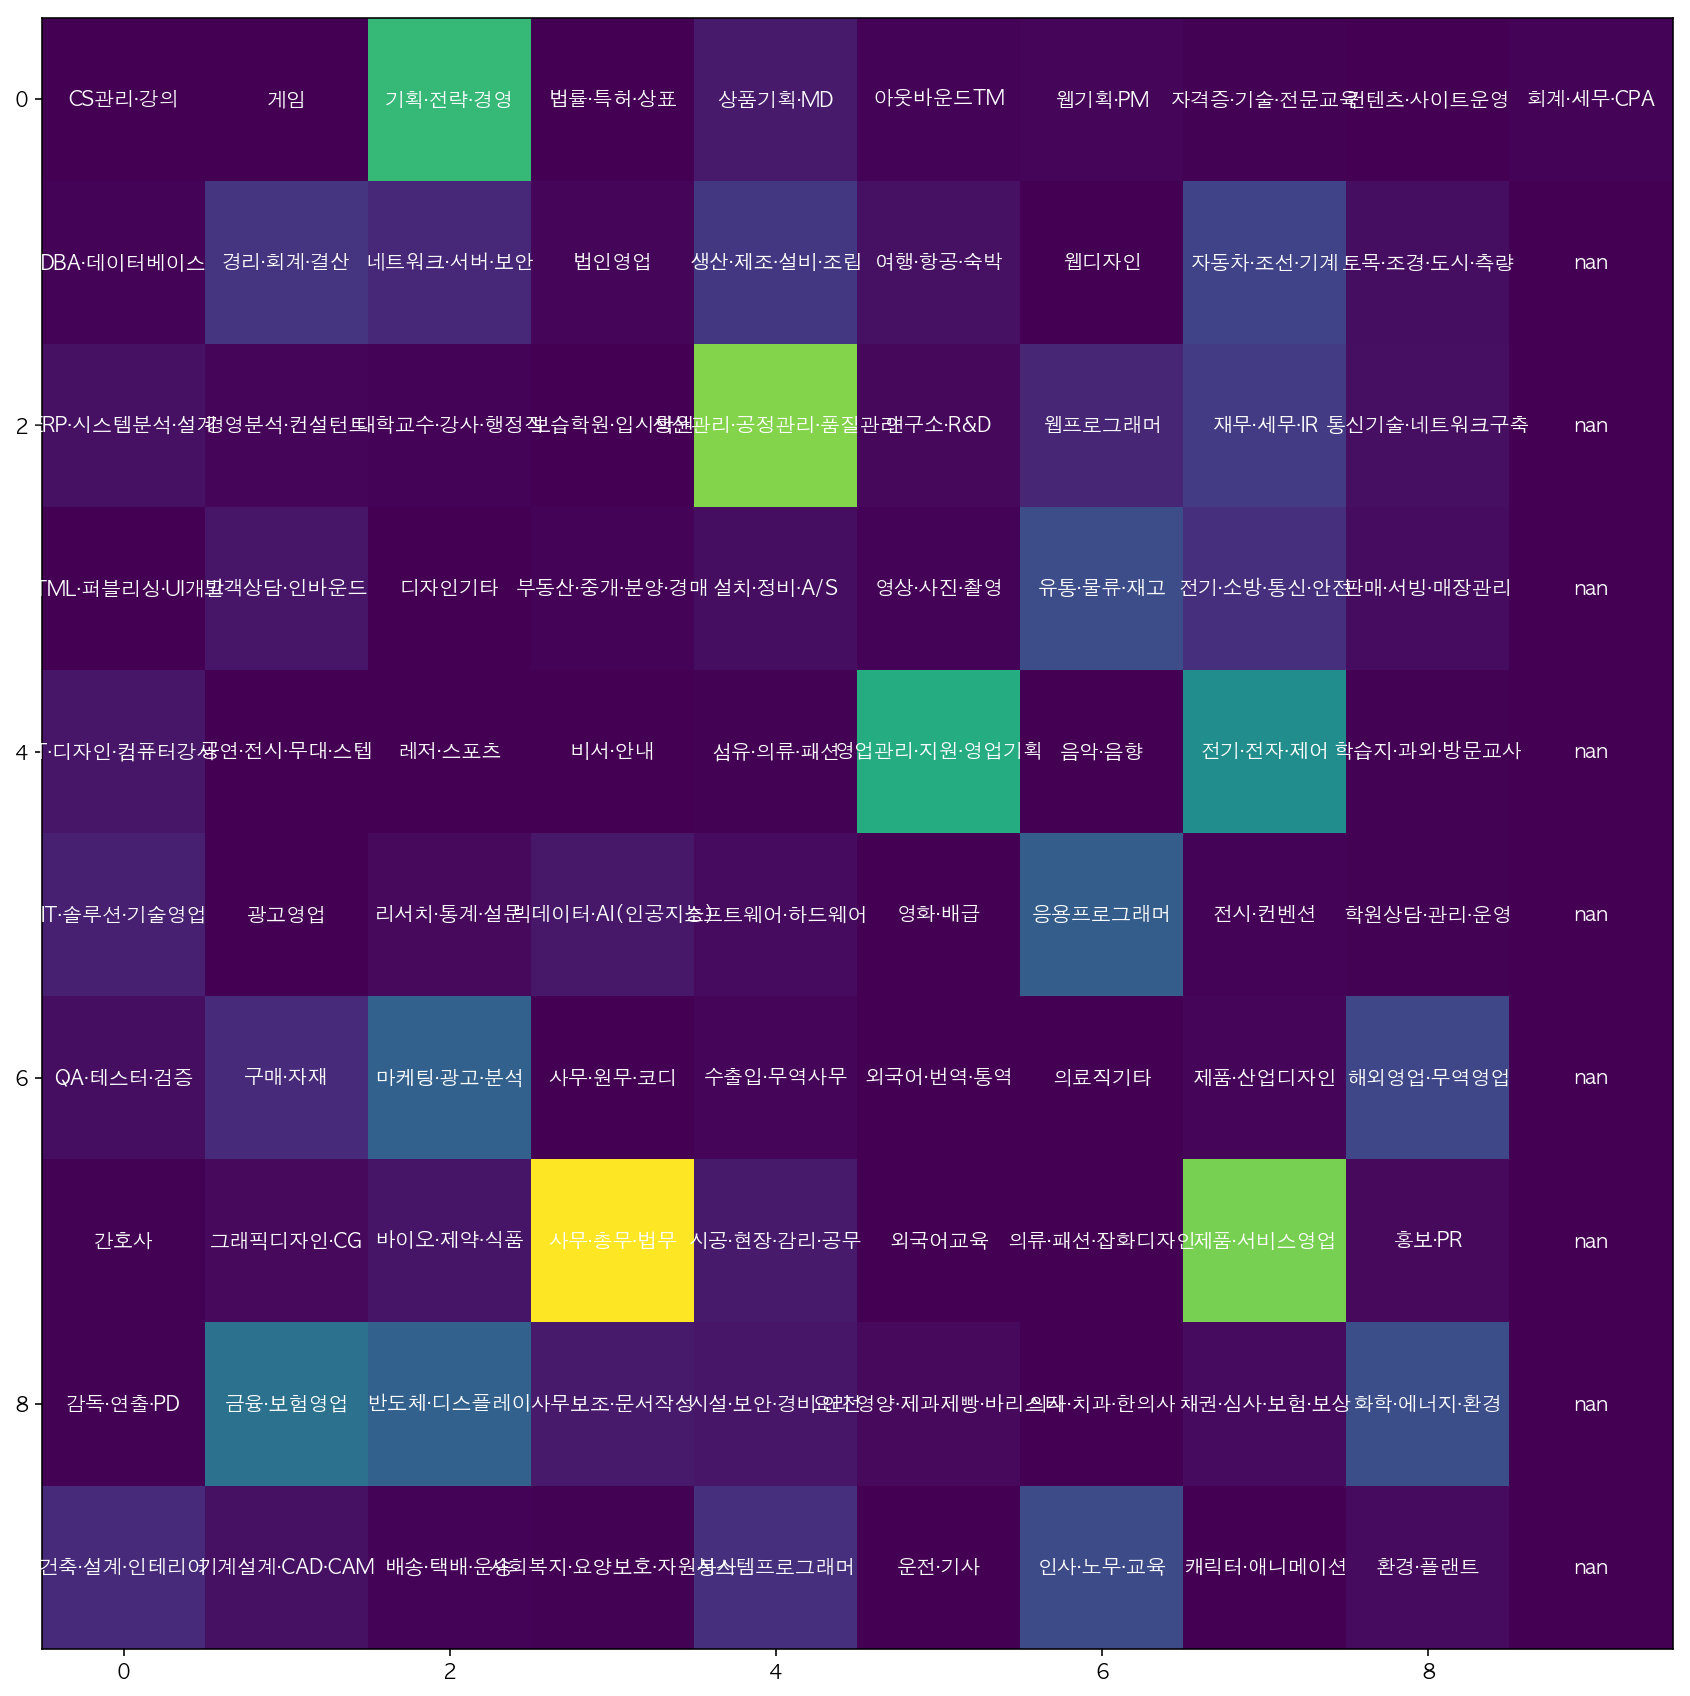

In [64]:
import numpy as np
%config InlineBackend.figure_format = 'retina'
task_num = np.array(task_num)
fig, ax = plt.subplots(figsize=(15,15))

a = np.pad(task_num, (0,9), 'constant', constant_values=0).reshape(10,10).T
im = ax.imshow(a)

for i in range(10):
    for j in range(10):
        text = ax.text(j,i, df_class_new.iloc[i][j],ha="center", va="center", color="w")

plt.savefig('data/task_class_num.png')

In [48]:
df = pd.concat([df, df_class], axis=1)

In [ ]:
df = df.drop(columns=['title','spec'])

In [55]:
def point_ratio(d):
    d = d['point']
    if d == None:
        return None
    return float(d.split('/')[0])/float(d.split('/')[1])
        

In [56]:
df['point_ratio'] = df.apply(point_ratio, axis=1)

In [61]:
df.to_csv('data/analysis.csv', index=False)